<a href="https://colab.research.google.com/github/ctarrington/try-python/blob/master/language-scraps/tuples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from matplotlib.pyplot import plot
from matplotlib import pyplot as ply

In [43]:
pairs = tuple( (x,y) for x in range(5) for y in range(5) )

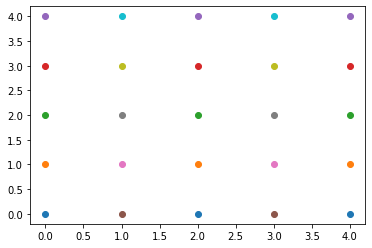

In [44]:
for pair in pairs:
  plot(*pair, 'o')
plt.show()

In [47]:
pairs[6]

(1, 1)